### 4. Distortion Correction
#### Distortion

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/77d68b8f-f3e4-4305-8459-560897465a0f)

Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image; this transformation isn’t perfect. Distortion actually changes what the shape and size of these 3D objects appear to be. So, the first step in analyzing camera images, is to undo this distortion so that you can get correct and useful information out of them.

### 5. Quiz: Effects of Distortion
#### QUIZ QUESTION

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/667e0951-99ed-4b8f-b972-3b5614aac3b8)

###### Why is it important to correct for image distortion?

* [X] Distortion can change the apparent size of an object in an image.

* [X] Distortion can change the apparent shape of an object in an image.

* [X] Distortion can cause an object's appearance to change depending on where it is in the field of view.

* [X] Distortion can make objects appear closer or farther away than they actually are.


### 6. Pinhole Camera Model

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a9f8aeb5-d619-4a58-aa90-6b1bb81cd675)

#### Types of Distortion

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called radial distortion, and it’s the most common type of distortion.

Another type of distortion, is tangential distortion. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.


#### Distortion Coefficients and Correction

There are three coefficients needed to correct for **radial distortion**: **k1**, **k2**, and **k3**. To correct the appearance of radially distorted points in an image, one can use a correction formula.

In the following equations, _(x,y)_ is a point in a distorted image. To undistort these points, OpenCV calculates r, which is the known distance between a point in an undistorted (corrected) image _(x_corrected, y_corrected)_ and the center of the image distortion, which is often the center of that image _(x_c, y_c)_. This center point _(x_c, y_c)_ is sometimes referred to as the distortion center. These points are pictured below.

_Note_: The distortion coefficient **k3** is required to accurately reflect major radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, **k3** has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: _[k1, k2, p1, p2, k3]_. In this course, we will use it in all calibration calculations so that our calculations apply to a wider variety of lenses (wider, like wide angle, haha) and can correct for both minor and major radial distortion.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840ae19_screen-shot-2016-12-01-at-3.10.19-pm/screen-shot-2016-12-01-at-3.10.19-pm.png)

Points in an distorted and undistorted (corrected) image. The point _(x, y)_ is a single point in a distorted image and _(x_corrected, y_corrected)_ is where that point will appear in the undistorted (corrected) image.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58364b0d_screen-shot-2016-11-23-at-6.05.49-pm/screen-shot-2016-11-23-at-6.05.49-pm.png)
Radial distortion correction.

There are two more coefficients that account for *tangential distortion*: *p1* and *p2*, and this distortion can be corrected using a different correction formula.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58364c09_screen-shot-2016-11-23-at-6.10.06-pm/screen-shot-2016-11-23-at-6.10.06-pm.png)

Tangential distortion correction.


### 7. Quiz: Image Formation
#### QUIZ QUESTION

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5c6e36cd-5662-4599-8348-c09d7a8ed781)

###### Fun fact: the "pinhole camera" is not just a model, but was actually the earliest means of projecting images, [first documented almost 2500 years ago in China!](https://en.wikipedia.org/wiki/Camera_obscura)

###### Now back to computer vision...what is the fundamental difference between images formed with a pinhole camera and those formed using lenses?

* [ ] Images formed by a pinhole camera are always flipped upside down, lensed images appear upright.

* [ ] Pinhole camera images are black and white, while lenses form color images.

* [X] Pinhole camera images are free from distortion, but lenses tend to introduce image distortion.

* [ ] Images formed by pinhole cameras are the same as those formed using lenses.


### 9. Finding Corners

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/bf149677-e05e-4813-a6ea-5fe76021516a)

In this exercise, you'll use the OpenCV functions `findChessboardCorners()` and `drawChessboardCorners()` to automatically find and draw corners in your image.

To learn more about both of those functions, you can watch the next video or look at the OpenCV documentation here: [cv2.findChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [cv2.drawChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners).

#### **You're going for a result like this:**

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583dcf04_corners-found3/corners-found3.jpg)

Count the number of corners in any given row and enter that value in **nx**. Similarly, count the number of corners in a given column and store that in **ny**. Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.

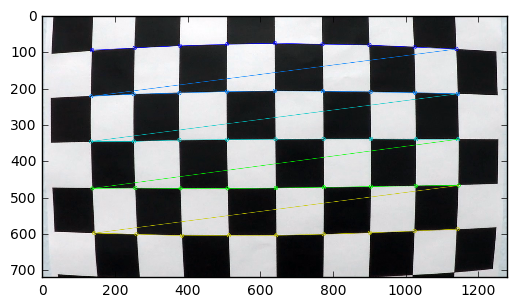

In [1]:
import numpy as np
import cv2
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 5 #TODO: enter the number of inside corners in y
objp = np.zeros((nx*ny,3), np.float32)

# Make a list of calibration images
fname = '../camera_cal/calibration1.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

### 10. Calibrating Your Camera

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a30f45cb-c1c0-482c-8e78-a26604841ec0)

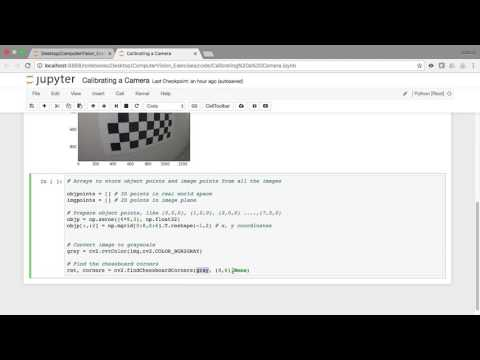

In [2]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('lA-I22LtvD4', width=880, height=495)

#### Examples of Useful Code

Converting an image, imported by cv2 or the glob API, to grayscale:

```python
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
```

_Note_: If you are reading in an image using mpimg.imread() this will read in an **RGB** image and you should convert to grayscale using _cv2.COLOR_RGB2GRAY_, but if you are using cv2.imread() or the glob API, as happens in this video example, this will read in a *BGR* image and you should convert to grayscale using _cv2.COLOR_BGR2GRAY_. We'll learn more about color conversions later on in this lesson, but please keep this in mind as you write your own code and look at code examples.

Finding the chessboard corners (for an 8x6 board):

```python
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
```

Drawing detected corners on an image:

```python
img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
```

Camera calibration, given object points, image points, and the **shape of the grayscale image**:

```python
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
```

Undistorting a test image:

```python
dst = cv2.undistort(img, mtx, dist, None, mtx)
```

### A note on image shape

The shape of the image, which is passed into the **calibrateCamera** function, is just the height and width of the image. One way to retrieve these values is by retrieving them from the **grayscale image shape** array ```gray.shape[::-1]```. This returns the image height and width in pixel values like (960, 1280).

Another way to retrieve the image shape is to get them directly from the _color_ image by retrieving the first two values in the color image shape array using ```img.shape[0:2]```. This code snippets asks for just the first two values in the shape array.

It's important to use an entire grayscale image shape _or_ the first two values of a color image shape. This is because the entire _shape_ of a color image will include a third value -- the number of color channels -- in addition to the height and width of the image. For example, the shape array of a color image might be (960, 1280, 3), which are the pixel height and width of an image (960, 1280) and a third value (3) that represents the three color channels in the color image which you'll learn more about later, and if you try to pass these three values into the calibrateCamera function, you'll get an error.

### Putting it all together

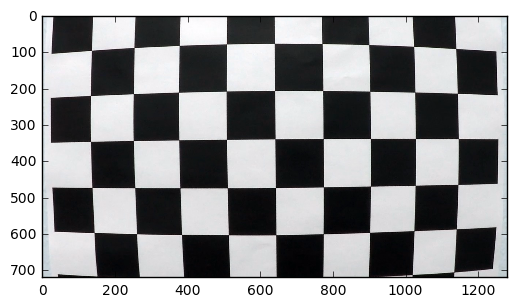

In [3]:
# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 5 #TODO: enter the number of inside corners in y
objp = np.zeros((nx*ny,3), np.float32)

# Make a list of calibration images
fname = '../camera_cal/calibration1.jpg'
img = cv2.imread(fname)
plt.imshow(img)

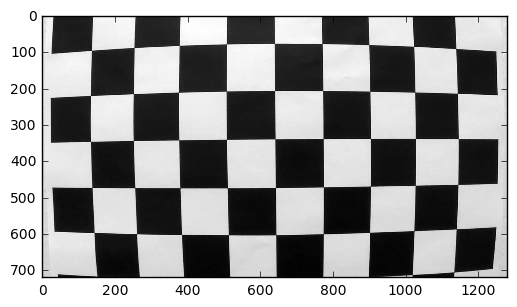

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

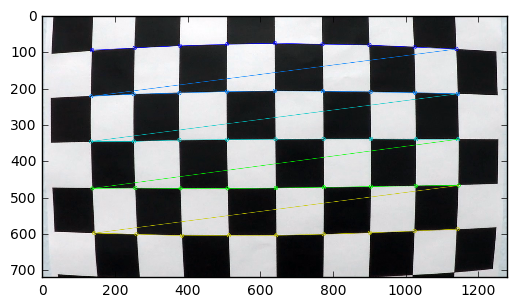

In [5]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [6]:
# If found, draw corners
if False and ret == True:
    # Camera calibration, given object points, image points, and the shape of the grayscale image
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    
    # Undistoring a test image
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(dst)

### 11. Correcting for Distortion

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5415176a-d615-49af-8535-53a385768a23)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582e25cf_orig-and-undist/orig-and-undist.png)

Here you'll get a chance to try camera calibration and distortion correction for yourself!

There are two main steps to this process: use chessboard images to identify image points and object points, and then use the OpenCV functions `cv2.calibrateCamera()` and `cv2.undistort()` to compute the calibration and undistortion.

Unfortunately, we can't perform the extraction of object points and image points in the browser quiz editor, so we provide these for you in the quiz below.

Try computing the calibration and undistortion in the exercise below, and if you want to play with extracting object points and image points yourself, go ahead and grab the IPython notebook and images in [this repository](https://github.com/udacity/CarND-Camera-Calibration).

If you run into any _errors_ as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up!

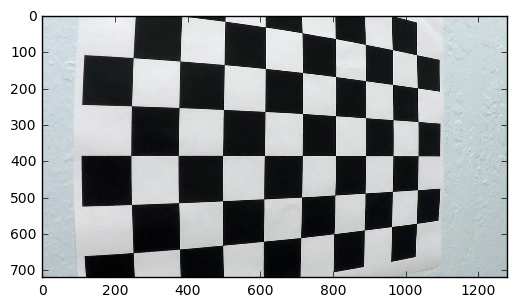

In [7]:
img = cv2.imread('../camera_cal/calibration5.jpg')
plt.imshow(img)

In [10]:
import numpy as np
import cv2
import glob
# import matplotlib.pyplot as plt
import os
# %matplotlib qt

def detect_corners(fname, nx, ny, draw_and_render=True):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        if draw_and_render == True:
            cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            write_name = '../camera_cal/corners_found/calibrated_'+str(os.path.basename(fname))+''
            cv2.imwrite(write_name, img)
            print(os.path.basename(fname)+" corners detected")
            cv2.imshow(os.path.basename(fname), img)
            cv2.waitKey(500)
    else:
        print("  *** Unable to detect corners for image at path {}".format(fname))
    return [ret, corners]

# base edges - doesn't work for all images in camera_cal directory
nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

def process_image(fname, nx, ny):
    ret, corners = detect_corners(fname, nx, ny)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):    
    process_image(fname, nx, ny)

# process the odd calibration images (those that don't have 9x6 edges)
odd_calibrations = [
    (9, 5, '../camera_cal/calibration1.jpg'), 
    (5, 4, '../camera_cal/calibration4.jpg'), 
    (9, 4, '../camera_cal/calibration5.jpg'),
]
#for nx, ny, fname in odd_calibrations:
#    process_image(fname, nx, ny)
#    print(fname+' processed')

cv2.destroyAllWindows()

# print(objpoints)

  *** Unable to detect corners for image at path ../camera_cal/calibration1.jpg
calibration10.jpg corners detected
calibration11.jpg corners detected
calibration12.jpg corners detected
calibration13.jpg corners detected
calibration14.jpg corners detected
calibration15.jpg corners detected
calibration16.jpg corners detected
calibration17.jpg corners detected
calibration18.jpg corners detected
calibration19.jpg corners detected
calibration2.jpg corners detected
calibration20.jpg corners detected
calibration3.jpg corners detected
  *** Unable to detect corners for image at path ../camera_cal/calibration4.jpg
  *** Unable to detect corners for image at path ../camera_cal/calibration5.jpg
calibration6.jpg corners detected
calibration7.jpg corners detected
calibration8.jpg corners detected
calibration9.jpg corners detected


(1280, 720)


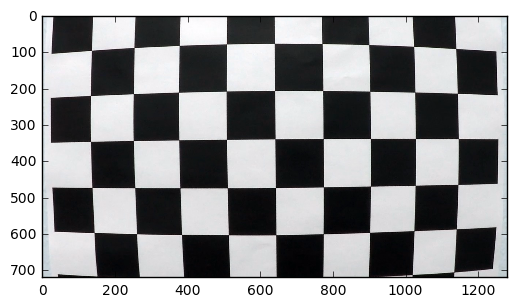

In [21]:
%matplotlib inline

# Test undistortion on an image
calibration_image = '../camera_cal/calibration1.jpg'
img = cv2.imread(calibration_image)

# extract image shape
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# This is the same thing as (img.shape[1], img.shape[0]) or img.shape[0:2][::-1]
# img_size = gray.shape[::-1]
# NOTE: tuple[::-1] reverses the order of the tuple items (e.g., (0,1)[::-1] == (1,0) )
img_size = img.shape[0:2][::-1]
print(img_size)

# plot image before undistortion
plt.imshow(img)

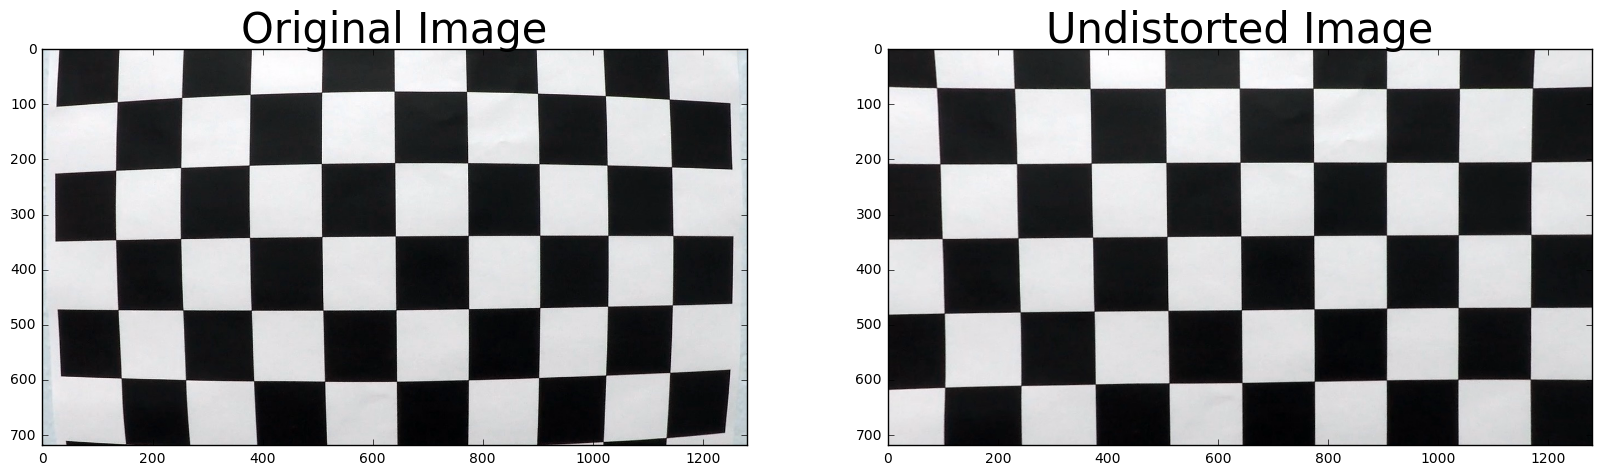

In [22]:
import pickle

# A function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera and cv2.undistort()
    # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2][::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# Do camera calibration given object points and image points
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
# dst = cv2.undistort(img, mtx, dist, None, mtx)
# print(mtx)
# print('\n\n')
# print(dist)

dst = cal_undistort(img, objpoints, imgpoints)
cv2.imwrite('../camera_cal/undistored/'+os.path.basename(calibration_image),dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "../camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)